In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

import warnings
from sklearn.exceptions import ConvergenceWarning

from sklearn.model_selection import train_test_split, KFold

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import pearsonr

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
df = pd.read_csv('datasets/winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<AxesSubplot:>

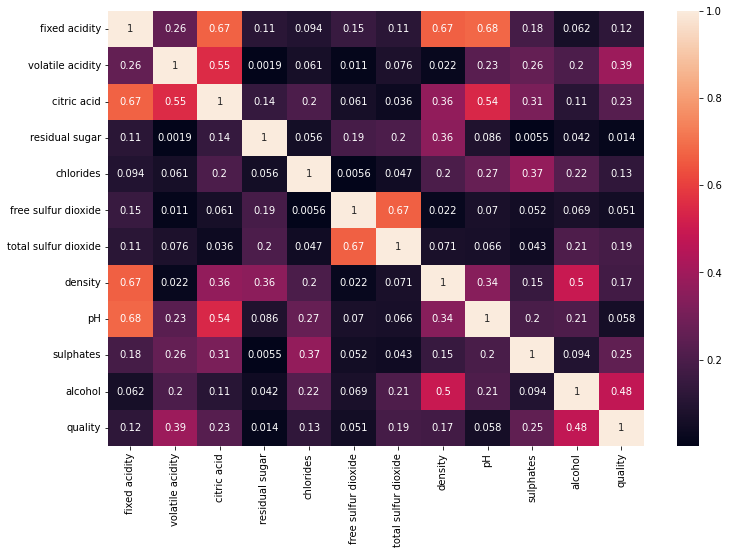

In [3]:
df_corr = np.abs(df.corr())
fig, ax = plt.subplots(figsize=(12,8))
sb.heatmap(df_corr, annot=True)

In [3]:
X = df.copy()
Y = X.pop('quality').to_numpy()
X = X.to_numpy()

x_train, x_test, y_train, y_test  = train_test_split(X,Y, test_size=0.30, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1119, 11), (480, 11), (1119,), (480,))

In [4]:
np.min(df['quality'].to_numpy()), np.max(df['quality'].to_numpy())

(3, 8)

## First Experiment

In [101]:
def getDataFrame(pred, real):
    _pred = pred.copy().reshape(1,-1)
    _real = real.copy().reshape(1,-1)

    df_data = np.concatenate((_pred,_real), axis=0)

    df_data = pd.DataFrame(df_data.T, columns=['Pred','Real'])
    df_data.head()
    return df_data

def print_pred(y_pred, y_test):
    a, b = 3,8
    lim = [a,b]
    fig, ax = plt.subplots(1,3, figsize=(15,5))
    ax[0].scatter( y_pred, y_test )
    ax[0].plot(lim,lim)
    ax[0].set_title('Comparation')
    sb.boxplot(y=y_test,ax=ax[1])
    ax[1].set_ylim(lim)
    ax[1].set_title('Real')
    sb.boxplot(y=y_pred,ax=ax[2])
    ax[2].set_ylim(lim)
    ax[2].set_title('Pred')
    plt.show()

d = dict()

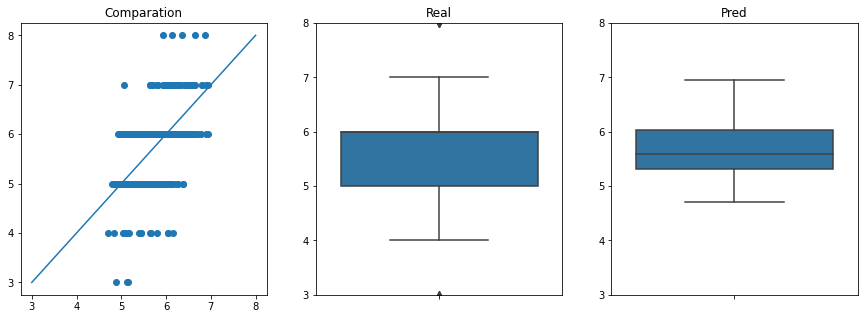

In [102]:
linear = LinearRegression()
linear.fit(x_train,y_train)
y_pred = linear.predict(x_test)
y_linear = y_pred
mae, mse, r2 = mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred), r2_score(y_test,y_pred)
d['Linear'] = { 'MAE':mae, 'MSE':mse, 'R2':r2 }
print_pred(y_pred, y_test)

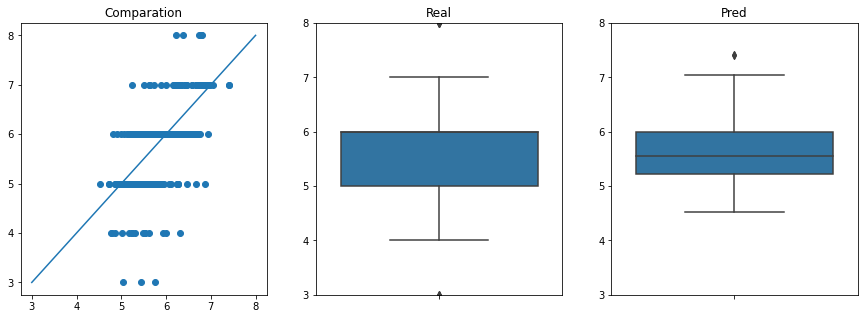

In [104]:
forest = RandomForestRegressor()
forest.fit(x_train,y_train)
y_pred = forest.predict(x_test)
y_forest = y_pred
mae, mse, r2 = mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred), r2_score(y_test,y_pred)
d['Forest'] = { 'MAE':mae, 'MSE':mse, 'R2':r2 }
print_pred(y_pred, y_test)

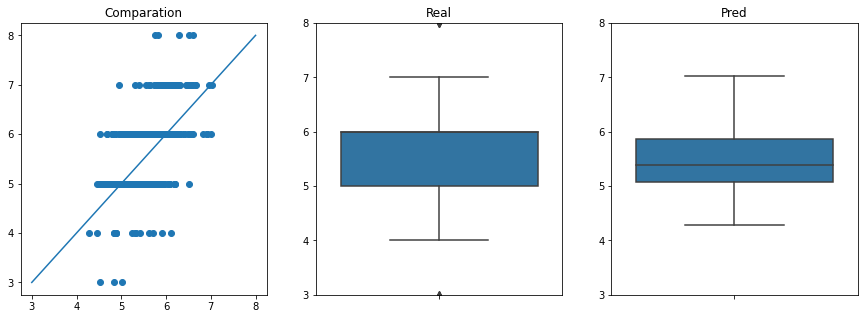

In [105]:
nn = MLPRegressor()
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning)
    nn.fit(x_train,y_train)
y_pred = nn.predict(x_test)
y_nn = y_pred
mae, mse, r2 = mean_absolute_error(y_test,y_pred), mean_squared_error(y_test,y_pred), r2_score(y_test,y_pred)
d['MLP'] = { 'MAE':mae, 'MSE':mse, 'R2':r2 }
print_pred(y_pred, y_test)

### Comparate models

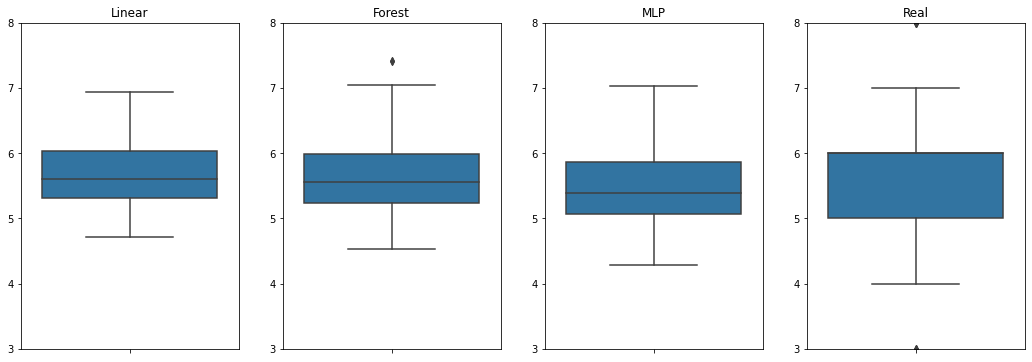

In [128]:
a, b = 3,8
lim = [a,b]
fig, ax = plt.subplots(1,4, figsize=(18,6))
sb.boxplot(y=y_linear,ax=ax[0])
ax[0].set_ylim(lim)
ax[0].set_title('Linear')
sb.boxplot(y=y_forest,ax=ax[1])
ax[1].set_ylim(lim)
ax[1].set_title('Forest')
sb.boxplot(y=y_nn,ax=ax[2])
ax[2].set_ylim(lim)
ax[2].set_title('MLP')
sb.boxplot(y=y_test,ax=ax[3])
ax[3].set_ylim(lim)
ax[3].set_title('Real')
plt.show()

In [110]:
df_stats = pd.DataFrame(d)

</div>
<center><h2> Metrics </h2>
</center> <br>

<table border="1" class="dataframe" style="margin: auto;">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Linear</th>
      <th>Forest</th>
      <th>MLP</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>MAE</th>
      <td>0.487126</td>
      <td>0.435729</td>
      <td>0.497903</td>
    </tr>
    <tr>
      <th>MSE</th>
      <td>0.400780</td>
      <td>0.354896</td>
      <td>0.426285</td>
    </tr>
    <tr>
      <th>R2</th>
      <td>0.320711</td>
      <td>0.398481</td>
      <td>0.277484</td>
    </tr>
  </tbody>
</table>

## Second Experiment

In [9]:
kf = KFold(n_splits=5, random_state=0, shuffle=True)
values = dict()
for i, (train_idx, test_idx) in enumerate(kf.split(X)):
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning)
        train_data, train_labels = X[train_idx,:], Y[train_idx]
        test_data, test_labels = X[test_idx,:], Y[test_idx]
        linear, forest, nn = LinearRegression(), RandomForestRegressor(), MLPRegressor()
        linear.fit(train_data, train_labels)
        forest.fit(train_data, train_labels)
        nn.fit(train_data, train_labels)
        values[f'It {i+1}'] = {
            'Linear': r2_score( linear.predict(test_data) ,test_labels),
            'Forest': r2_score( forest.predict(test_data) ,test_labels),
            'MLP': r2_score( nn.predict(test_data) ,test_labels)
        }

df_values = pd.DataFrame(values)
df_values = df_values.T
df_values

,Linear,Forest,MLP
It 1,-0.588831,-0.171856,-0.524429
It 2,-1.131152,-0.336345,-0.718190
It 3,-1.019527,-0.170669,-0.763879
It 4,-0.857936,-0.061137,-0.830936
It 5,-0.506524,0.130498,-0.824432


In [ ]:
df_values.to_html()

</div>
<center><h2> R2 Values </h2>
</center> <br>

<table border="1" class="dataframe" style="margin: auto;">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Linear</th>
      <th>Forest</th>
      <th>MLP</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>It 1</th>
      <td>-0.588831</td>
      <td>-0.171856</td>
      <td>-0.524429</td>
    </tr>
    <tr>
      <th>It 2</th>
      <td>-1.131152</td>
      <td>-0.336345</td>
      <td>-0.718190</td>
    </tr>
    <tr>
      <th>It 3</th>
      <td>-1.019527</td>
      <td>-0.170669</td>
      <td>-0.763879</td>
    </tr>
    <tr>
      <th>It 4</th>
      <td>-0.857936</td>
      <td>-0.061137</td>
      <td>-0.830936</td>
    </tr>
    <tr>
      <th>It 5</th>
      <td>-0.506524</td>
      <td>0.130498</td>
      <td>-0.824432</td>
    </tr>
  </tbody>
</table>

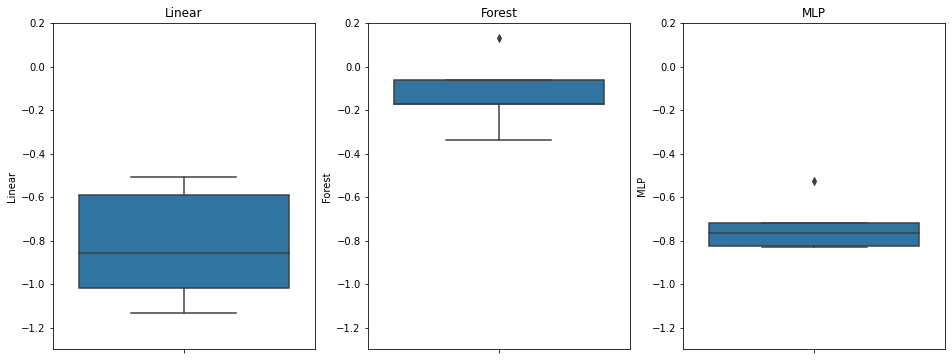

In [21]:
a, b = -1.3,0.2
lim = [a,b]
fig, ax = plt.subplots(1,3, figsize=(16,6))
names = ['Linear', 'Forest', 'MLP']
for _ in range(3):
    sb.boxplot(y=df_values[names[_]],ax=ax[_])
    ax[_].set_ylim(lim)
    ax[_].set_title(names[_])

# Conclusions

On the first experiment, we can clearly see that none of these models works properly for this regression model, as it can be more considered as a classification model, as all of the values are discrete.

Nevertheless, if we round the values, the MLP model seems to work well as it aproximates better to the values. On the boxplot we can see that this model gets closer to the edges than the other models, where the forest and linear models seems to work similary.

On the second experiment, we can see that very model is predicting very bad. Just one of the whole iterations. In this case, the cross training works better on the forest model, being more consistent on the r3 metric.

But other than that, all the model performs really bad for this problem.

For a better performance, we can try improve on the training time, or changing he models. Probably in the second experiment the reason of such a bad performance was the training time, adding that we create a new model each step. If we keep that model for each training step it could perform better.